# Process diked area data for input into SLAMM

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import rioxarray as rx

In [8]:
# data paths
raw_data = "../data/raw/"
clean_data = "../data/clean/"

# read in dams
ma_dams = gpd.read_file(raw_data + "dams/ma/DAMS_PT.shp")
ri_dams = gpd.read_file(raw_data + "dams/ri/Dams.shp")

# Read in the saltmarsh buffers
cc1_buffer = gpd.read_file(clean_data + "chosen_saltmarshes/CC-1_buffer.shp") 
ma2_buffer = gpd.read_file(clean_data + "chosen_saltmarshes/MA-2_buffer.shp") 
ri2_buffer = gpd.read_file(clean_data + "chosen_saltmarshes/ri2_vegtype.shp") 

# Read in NWIs
ri_nwi= gpd.read_file(raw_data + "nwi/RI_shapefile_wetlands/RI_Wetlands.shp")
ma_nwi= gpd.read_file(raw_data + "nwi/MA_shapefile_wetlands/MA_Wetlands.shp")

In [11]:
# function to get diked area of NWI and plot dams with the diked area
def get_nwi_diked(nwi: gpd.GeoDataFrame, extent_shp: gpd.GeoDataFrame, dam_points: gpd.GeoDataFrame, which_crs):
    
    # reproject to wanted crs
    nwi_crs = nwi.to_crs(which_crs)
    extent_shp_crs = extent_shp.to_crs(which_crs)
    dam_points_crs = dam_points.to_crs(which_crs)

    # crop dam points for mapping
    marsh_dams = dam_points_crs.clip(box(*extent_shp_crs.total_bounds))
    
    # Crop NWI to saltmarsh extent
    marsh_nwi = nwi_crs.clip(box(*extent_shp_crs.total_bounds))

    # filter to NWI “diked or impounded” attribute “h”
    nwi_diked = marsh_nwi[marsh_nwi.ATTRIBUTE.str.contains('h')]

    # Add a boolean column so that dikes area is 1
    nwi_diked['value'] = 1

    # Map dams and diked areas
    fig, ax = plt.subplots(figsize=(10, 10))
    marsh_nwi.plot(ax = ax)
    nwi_diked.plot(ax = ax, color = "yellow")
    marsh_dams.plot(ax = ax, color = "red")

    return nwi_diked

CC-1

c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ATTRIBUTE,WETLAND_TY,ACRES,Shape_Leng,Shape_Area,geometry,value
259475,PUBHh,Freshwater Pond,0.257333,140.341008,1041.387747,"POLYGON ((-7845228.394 5096559.231, -7845236.0...",1
259476,PUBHh,Freshwater Pond,10.557382,1077.356093,42724.208610,"POLYGON ((-7845717.597 5096738.030, -7845709.3...",1
259482,PUBHh,Freshwater Pond,13.105335,2177.707079,53035.407345,"POLYGON ((-7844218.723 5097109.533, -7844215.4...",1
259477,PUBHh,Freshwater Pond,0.396991,145.407269,1606.565740,"POLYGON ((-7845188.724 5096817.240, -7845198.4...",1
259478,PUBHh,Freshwater Pond,0.209656,123.382857,848.447387,"POLYGON ((-7845251.248 5096987.979, -7845256.3...",1


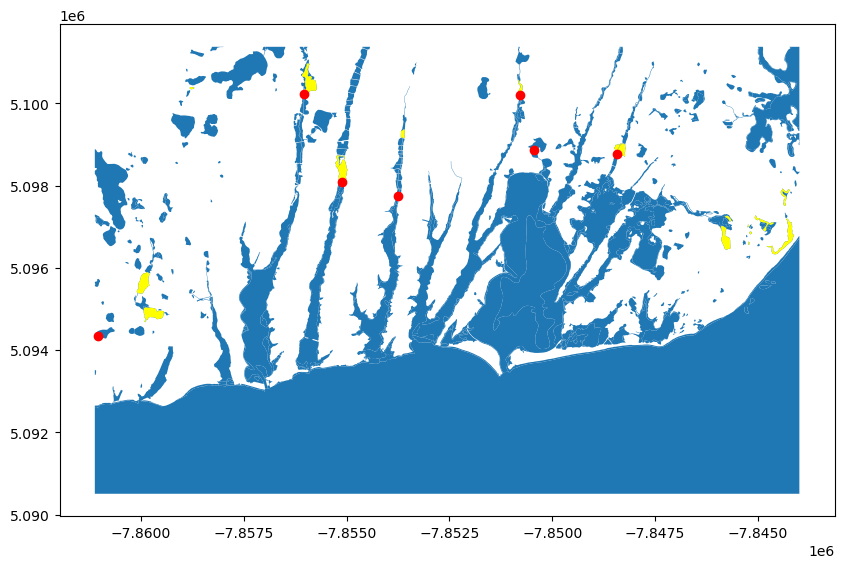

In [15]:
cc1_nwi_diked = get_nwi_diked(ma_nwi, cc1_buffer, ma_dams, 3857)
cc1_nwi_diked.head()

MA-2

c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ATTRIBUTE,WETLAND_TY,ACRES,Shape_Leng,Shape_Area,geometry,value
273939,PUBHh,Freshwater Pond,1.304413,375.580986,5278.772871,"POLYGON ((-7878935.788 5115640.904, -7878941.9...",1
273950,PUBHh,Freshwater Pond,0.316902,174.088347,1282.457310,"POLYGON ((-7877810.589 5118878.027, -7877803.5...",1
274358,PUBVh,Freshwater Pond,1.033584,245.678686,4182.767358,"POLYGON ((-7859835.469 5115593.771, -7859851.7...",1
274359,PUBVh,Freshwater Pond,2.131799,537.907593,8627.086283,"POLYGON ((-7859462.408 5115751.848, -7859455.5...",1
274360,PUBVh,Freshwater Pond,2.265968,387.582936,9170.045893,"POLYGON ((-7859430.855 5115827.528, -7859445.2...",1
...,...,...,...,...,...,...,...
259552,PUBHh,Freshwater Pond,0.670887,229.629952,2714.984116,"POLYGON ((-7877641.727 5128756.726, -7877645.0...",1
259565,PUBHh,Freshwater Pond,1.514640,536.929742,6129.532455,"POLYGON ((-7873275.321 5129174.260, -7873272.2...",1
259583,PUBHh,Freshwater Pond,2.623342,606.549020,10616.288694,"POLYGON ((-7865891.905 5129157.417, -7865888.0...",1
264103,L1UBHh,Lake,93.395152,5826.441785,377956.770315,"POLYGON ((-7872050.242 5129171.711, -7872056.0...",1


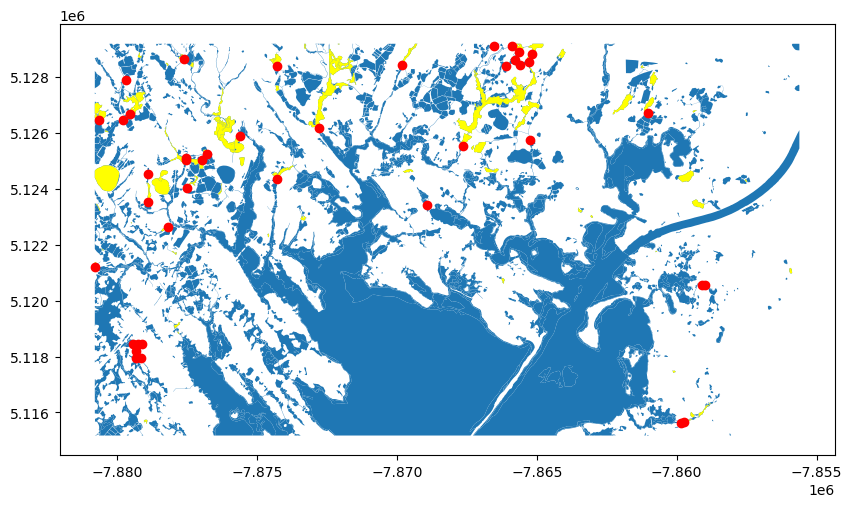

In [14]:
ma2_nwi_diked = get_nwi_diked(ma_nwi, ma2_buffer, ma_dams, 3857)
ma2_nwi_diked

RI-2

c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ATTRIBUTE,WETLAND_TY,ACRES,Shape_Leng,Shape_Area,geometry,value
28790,PUBHh,Freshwater Pond,8.763937,885.787441,35466.396318,"POLYGON ((806310.717 4627981.942, 806312.303 4...",1
28868,PUBHh,Freshwater Pond,1.943740,373.152076,7866.035827,"POLYGON ((805186.728 4627409.029, 805190.218 4...",1
28869,PUBHh,Freshwater Pond,1.177514,385.534701,4765.231638,"POLYGON ((805170.009 4627515.258, 805171.387 4...",1
28870,PUBHh,Freshwater Pond,0.278342,144.878295,1126.408602,"POLYGON ((804588.415 4627703.696, 804585.524 4...",1
28809,PSS1Ch,Freshwater Forested/Shrub Wetland,0.489853,166.967013,1982.365340,"POLYGON ((805464.729 4627861.159, 805461.185 4...",1


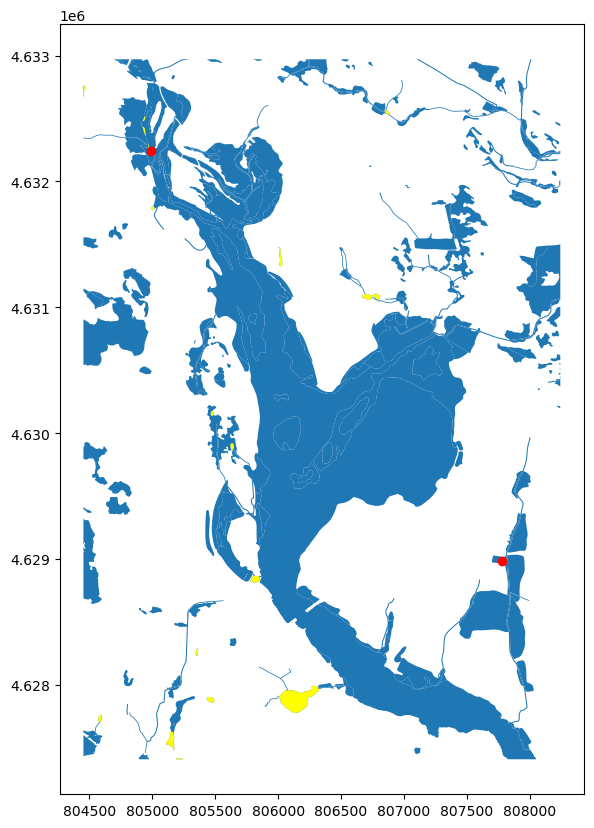

In [12]:
ri2_nwi_diked = get_nwi_diked(ri_nwi, ri2_buffer, ri_dams, 26918)
ri2_nwi_diked.head()

Rasterize the dikes area polygon

In [17]:
from geocube.api.core import make_geocube

In [11]:
# read in the DEMs to make this dataset match them
cc1_dem = rx.open_rasterio(clean_data + "dem/cc1_dem.tif")
ma2_dem = rx.open_rasterio(clean_data + "dem/ma2_dem.tif")
ri2_dem = rx.open_rasterio(clean_data + "dem/ri2_dem.tif")

In [12]:
cc1_dike_rast = make_geocube(
    vector_data=cc1_nwi_diked,
    measurements=["value"],
    like=cc1_dem,
    fill = 0
)

In [14]:
ma2_dike_rast = make_geocube(
    vector_data=ma2_nwi_diked,
    measurements=["value"],
    like=ma2_dem,
    fill = 0
)

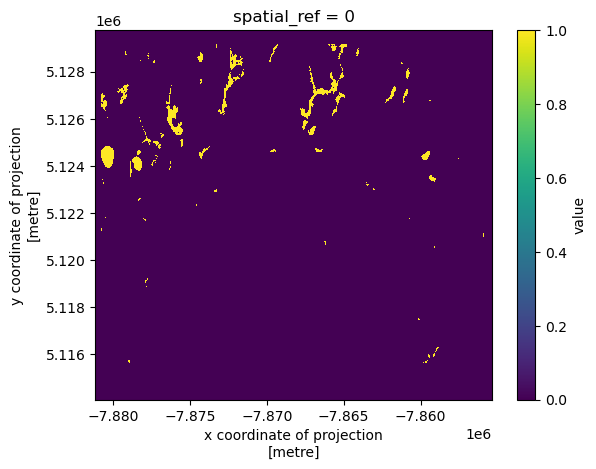

In [18]:
ma2_dike_rast["value"].plot()

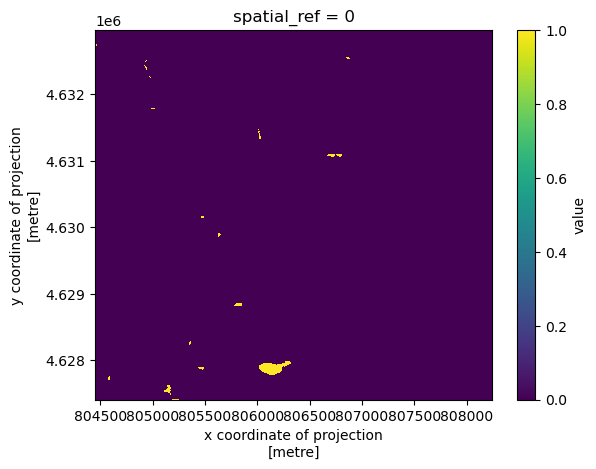

In [18]:
ri2_dike_rast = make_geocube(
    vector_data=ri2_nwi_diked,
    measurements=["value"],
    like=ri2_dem,
    fill = 0
)
ri2_dike_rast["value"].plot()

In [17]:
# Export
cc1_dike_rast.rio.to_raster(clean_data + "diked_area/cc1_dike_area.asc")
ma2_dike_rast.rio.to_raster(clean_data + "diked_area/ma2_dike_area.asc")
ri2_dike_rast.rio.to_raster(clean_data + "diked_area/ri_dike_area.asc")